In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm # A progress bar for long loops!

# Set up matplotlib for better display
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 6)

# --- Configuration ---
VIDEO_PATH = "../data/test_match1.mp4" 

## 2. Motion Score Calculation

In [5]:
# Check if the video file exists
if not os.path.exists(VIDEO_PATH):
    print(f"Error: Video file not found at {VIDEO_PATH}")
else:
    print("Starting motion analysis. This will take several minutes...")
    cap = cv.VideoCapture(VIDEO_PATH)
    
    # Get video properties
    frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv.CAP_PROP_FPS)
    
    # Read the first frame
    ret, prev_frame = cap.read()
    if not ret:
        print("Error: Could not read the first frame.")
    else:
        prev_gray = cv.cvtColor(prev_frame, cv.COLOR_BGR2GRAY)
        
        motion_scores = []
        
        # Use tqdm for a nice progress bar
        with tqdm(total=frame_count - 1, desc="Processing frames") as pbar:
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break # End of video
                
                # --- Core Logic from your technical document ---
                gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
                
                # Calculate Dense Optical Flow
                flow = cv.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
                
                # Calculate magnitude of the flow vectors
                magnitude, _ = cv.cartToPolar(flow[..., 0], flow[..., 1])
                
                # Store the mean magnitude as the motion score for this frame
                frame_motion_score = np.mean(magnitude)
                motion_scores.append(frame_motion_score)
                
                # Update previous frame
                prev_gray = gray
                pbar.update(1)

        cap.release()
        print("Motion analysis complete.")
        # Convert to a NumPy array for easier calculations later
        motion_scores = np.array(motion_scores)

Starting motion analysis. This will take several minutes...


Processing frames:   0%|          | 0/350 [00:00<?, ?it/s]

Motion analysis complete.


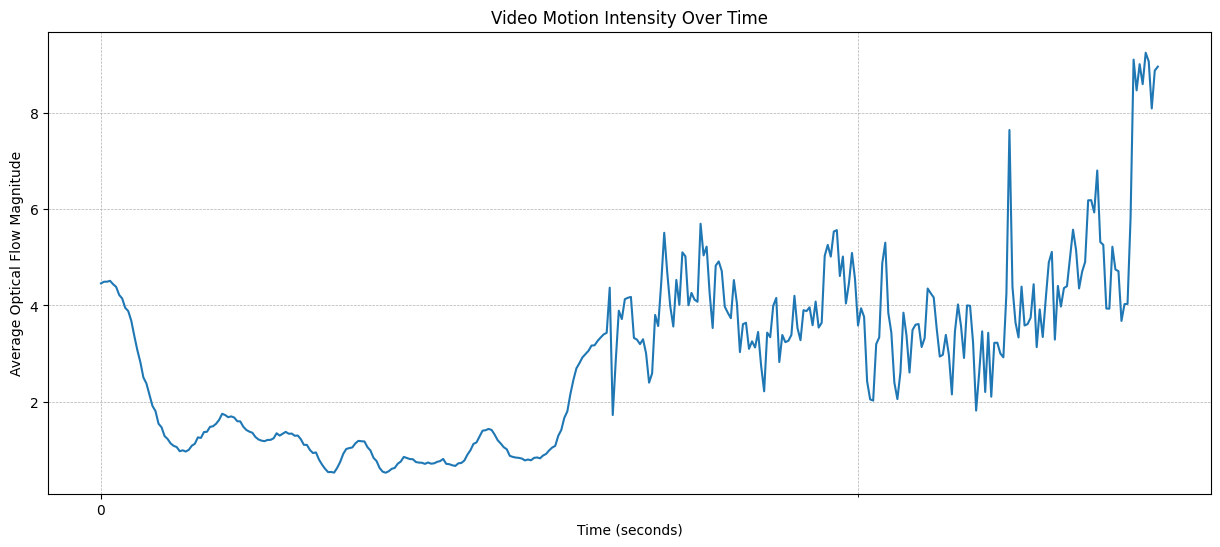

In [6]:
if 'motion_scores' in locals() and len(motion_scores) > 0:
    # Create a time axis for the motion scores
    # Each score corresponds to a frame transition, so it's aligned with the frame number
    num_frames = len(motion_scores)
    time_axis = np.arange(num_frames) / fps
    
    fig, ax = plt.subplots()
    ax.plot(time_axis, motion_scores)
    ax.set_title('Video Motion Intensity Over Time')
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Average Optical Flow Magnitude')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Use the same ticker settings for easy comparison with the audio plot
    from matplotlib.ticker import MultipleLocator
    ax.xaxis.set_major_locator(MultipleLocator(50))
    ax.xaxis.set_minor_locator(MultipleLocator(10))

    plt.show()
else:
    print("Motion scores not calculated. Please run the previous cell.")